In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from qmplot import manhattanplot
import re
from numpy.linalg import inv
from pathlib import Path 

In [2]:
df_candidate = pd.read_table("../output_csv/df_candidate.csv", low_memory=False, sep=";")

In [3]:
df_candidate

,chromosome,base_pair_location,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z
0,1,693731,A,G,0.393443,-1.322034,-0.129630,0.369748,-0.193548,-0.223242
1,1,180518603,T,C,-0.340426,1.219512,1.566667,0.388489,-0.390244,-1.887906
2,1,180518806,A,C,-0.097561,-0.297297,0.444444,-1.069231,0.780488,0.098940
3,1,180519091,T,G,0.666667,-0.086957,-0.705882,-1.675000,-1.875000,-1.523077
4,1,180519109,T,C,-0.877551,-0.046512,-2.000000,0.022222,-1.076923,-0.805471
...,...,...,...,...,...,...,...,...,...,...
44245761,24,1832945,A,G,NaN,NaN,-0.632013,NaN,NaN,NaN
44245762,24,1832475,T,C,NaN,NaN,0.172690,NaN,NaN,NaN
44245763,25,13276,T,C,NaN,NaN,NaN,NaN,-1.918919,NaN
44245764,26,24385419,A,G,NaN,NaN,NaN,NaN,0.289474,NaN


In [4]:
df_fi_fg = df_candidate[['fi_z', 'fg_z']]

In [5]:
df_fi_fg = df_fi_fg.dropna()
df_fi_fg

,fi_z,fg_z
0,0.393443,-1.322034
1,-0.340426,1.219512
2,-0.097561,-0.297297
3,0.666667,-0.086957
4,-0.877551,-0.046512
...,...,...
44243976,-0.912500,-0.031746
44243977,0.956656,0.311772
44243978,0.250923,0.060890
44243979,-0.810198,-1.294521


In [6]:
df_fi_hba1c = df_candidate[['fi_z', 'hba1c_z']]
df_fi_hba1c = df_fi_hba1c.dropna()
df_fi_hba1c

,fi_z,hba1c_z
0,0.393443,-0.129630
1,-0.340426,1.566667
2,-0.097561,0.444444
3,0.666667,-0.705882
4,-0.877551,-2.000000
...,...,...
44243976,-0.912500,0.319149
44243977,0.956656,-2.308492
44243978,0.250923,0.216718
44243979,-0.810198,0.626050


In [7]:
df_fi_t2d = df_candidate[['fi_z', 't2d_z']]
df_fi_t2d = df_fi_t2d.dropna()
df_fi_t2d

,fi_z,t2d_z
0,0.393443,0.369748
1,-0.340426,0.388489
2,-0.097561,-1.069231
3,0.666667,-1.675000
4,-0.877551,0.022222
...,...,...
42959846,-1.777778,-1.896552
42959847,0.319728,-0.135187
42959848,0.959596,-1.786885
42959849,1.076923,0.308824


In [8]:
df_fi_bmi = df_candidate[['fi_z', 'bmi_z']]
df_fi_bmi = df_fi_bmi.dropna()
df_fi_bmi

,fi_z,bmi_z
0,0.393443,-0.193548
1,-0.340426,-0.390244
2,-0.097561,0.780488
3,0.666667,-1.875000
4,-0.877551,-1.076923
...,...,...
43310913,-0.544038,-0.844660
43310928,2.146561,0.893836
43310929,0.177192,0.228929
43427267,-0.045833,-1.647059


In [9]:
df_fi_gcn = df_candidate[['fi_z', 'gcn_z']]
df_fi_gcn = df_fi_gcn.dropna()
df_fi_gcn

,fi_z,gcn_z
0,0.393443,-0.223242
1,-0.340426,-1.887906
2,-0.097561,0.098940
3,0.666667,-1.523077
4,-0.877551,-0.805471
...,...,...
43050975,1.369565,0.355828
43050976,-0.027757,-1.303881
43050977,-0.559102,-0.711965
43050978,0.620825,0.136691


In [10]:
df_fg_hba1c = df_candidate[['fg_z', 'hba1c_z']]
df_fg_hba1c = df_fg_hba1c.dropna()
df_fg_hba1c

,fg_z,hba1c_z
0,-1.322034,-0.129630
1,1.219512,1.566667
2,-0.297297,0.444444
3,-0.086957,-0.705882
4,-0.046512,-2.000000
...,...,...
44244227,0.764605,0.173170
44244230,0.020870,-0.827650
44244233,-0.031412,-0.045679
44244238,0.034611,0.068025


In [11]:
df_fg_t2d = df_candidate[['fg_z', 't2d_z']]
df_fg_t2d = df_fg_t2d.dropna()
df_fg_t2d

,fg_z,t2d_z
0,-1.322034,0.369748
1,1.219512,0.388489
2,-0.297297,-1.069231
3,-0.086957,-1.675000
4,-0.046512,0.022222
...,...,...
42959846,-1.367347,-1.896552
42959847,0.758824,-0.135187
42959848,0.204545,-1.786885
42959849,-0.083333,0.308824


In [12]:
df_fg_bmi = df_candidate[['fg_z', 'bmi_z']]
df_fg_bmi = df_fg_bmi.dropna()
df_fg_bmi

,fg_z,bmi_z
0,-1.322034,-0.193548
1,1.219512,-0.390244
2,-0.297297,0.780488
3,-0.086957,-1.875000
4,-0.046512,-1.076923
...,...,...
43330934,-0.697334,0.938742
43330935,1.628680,0.245081
43427267,-0.595331,-1.647059
43788399,-0.425641,0.602273


In [15]:
df_fg_gcn = df_candidate[['fg_z', 'gcn_z']]
df_fg_gcn = df_fg_gcn.dropna()
df_fg_gcn

,fg_z,gcn_z
0,-1.322034,-0.223242
1,1.219512,-1.887906
2,-0.297297,0.098940
3,-0.086957,-1.523077
4,-0.046512,-0.805471
...,...,...
43050975,0.701299,0.355828
43050976,0.583857,-1.303881
43050977,1.079119,-0.711965
43050978,0.406562,0.136691


In [16]:
df_hba1c_t2d = df_candidate[['hba1c_z', 't2d_z']]
df_hba1c_t2d = df_hba1c_t2d.dropna()
df_hba1c_t2d

,hba1c_z,t2d_z
0,-0.129630,0.369748
1,1.566667,0.388489
2,0.444444,-1.069231
3,-0.705882,-1.675000
4,-2.000000,0.022222
...,...,...
42959846,-0.777778,-1.896552
42959847,0.305085,-0.135187
42959848,1.140845,-1.786885
42959849,1.000000,0.308824


In [17]:
df_hba1c_bmi = df_candidate[['hba1c_z', 'bmi_z']]
df_hba1c_bmi = df_hba1c_bmi.dropna()
df_hba1c_bmi

,hba1c_z,bmi_z
0,-0.129630,-0.193548
1,1.566667,-0.390244
2,0.444444,0.780488
3,-0.705882,-1.875000
4,-2.000000,-1.076923
...,...,...
43362767,-0.905321,-0.223975
43362768,-0.763603,-0.255319
43427267,0.200873,-1.647059
43788399,1.589041,0.602273


In [18]:
df_hba1c_gcn = df_candidate[['hba1c_z', 'gcn_z']]
df_hba1c_gcn = df_hba1c_gcn.dropna()
df_hba1c_gcn

,hba1c_z,gcn_z
0,-0.129630,-0.223242
1,1.566667,-1.887906
2,0.444444,0.098940
3,-0.705882,-1.523077
4,-2.000000,-0.805471
...,...,...
43050975,0.583333,0.355828
43050976,0.499385,-1.303881
43050977,-0.050994,-0.711965
43050978,-0.380385,0.136691


In [19]:
df_t2d_bmi = df_candidate[['t2d_z', 'bmi_z']]
df_t2d_bmi = df_t2d_bmi.dropna()
df_t2d_bmi

,t2d_z,bmi_z
0,0.369748,-0.193548
1,0.388489,-0.390244
2,-1.069231,0.780488
3,-1.675000,-1.875000
4,0.022222,-1.076923
...,...,...
42959846,-1.896552,-0.909091
42959847,-0.135187,0.029661
42959848,-1.786885,-0.242857
42959849,0.308824,-0.210526


In [20]:
df_t2d_gcn = df_candidate[['t2d_z', 'gcn_z']]
df_t2d_gcn = df_t2d_gcn.dropna()
df_t2d_gcn

,t2d_z,gcn_z
0,0.369748,-0.223242
1,0.388489,-1.887906
2,-1.069231,0.098940
3,-1.675000,-1.523077
4,0.022222,-0.805471
...,...,...
42959845,0.719298,-1.823232
42959846,-1.896552,-1.728495
42959848,-1.786885,0.134441
42959849,0.308824,1.011881


In [21]:
df_bmi_gcn = df_candidate[['bmi_z', 'gcn_z']]
df_bmi_gcn = df_bmi_gcn.dropna()
df_bmi_gcn

,bmi_z,gcn_z
0,-0.193548,-0.223242
1,-0.390244,-1.887906
2,0.780488,0.098940
3,-1.875000,-1.523077
4,-1.076923,-0.805471
...,...,...
43050975,1.047619,0.355828
43050976,-0.630682,-1.303881
43050977,0.888169,-0.711965
43050978,0.590909,0.136691


In [22]:
df_fi = df_candidate[['fi_z']]
df_fi = df_fi.dropna()
df_fi

,fi_z
0,0.393443
1,-0.340426
2,-0.097561
3,0.666667
4,-0.877551
...,...
44243976,-0.912500
44243977,0.956656
44243978,0.250923
44243979,-0.810198


In [23]:
df_fg = df_candidate[['fg_z']]
df_fg = df_fg.dropna()
df_fg

,fg_z
0,-1.322034
1,1.219512
2,-0.297297
3,-0.086957
4,-0.046512
...,...
44244238,0.034611
44244239,1.233293
44244240,0.035022
44244241,-1.188843


In [24]:
df_hba1c = df_candidate[['hba1c_z']]
df_hba1c = df_hba1c.dropna()
df_hba1c

,hba1c_z
0,-0.129630
1,1.566667
2,0.444444
3,-0.705882
4,-2.000000
...,...
44245758,0.760591
44245759,2.020469
44245760,-0.894581
44245761,-0.632013


In [25]:
df_t2d = df_candidate[['t2d_z']]
df_t2d = df_t2d.dropna()
df_t2d

,t2d_z
0,0.369748
1,0.388489
2,-1.069231
3,-1.675000
4,0.022222
...,...
42959846,-1.896552
42959847,-0.135187
42959848,-1.786885
42959849,0.308824


In [26]:
df_bmi = df_candidate[['bmi_z']]
df_bmi = df_bmi.dropna()
df_bmi

,bmi_z
0,-0.193548
1,-0.390244
2,0.780488
3,-1.875000
4,-1.076923
...,...
44214552,-0.743243
44214553,3.140351
44245763,-1.918919
44245764,0.289474


In [27]:
df_gcn = df_candidate[['gcn_z']]
df_gcn = df_gcn.dropna()
df_gcn

,gcn_z
0,-0.223242
1,-1.887906
2,0.098940
3,-1.523077
4,-0.805471
...,...
43050976,-1.303881
43050977,-0.711965
43050978,0.136691
43050979,0.294908


In [28]:
df_fi_fg[['fi_z', 'fg_z']]

,fi_z,fg_z
0,0.393443,-1.322034
1,-0.340426,1.219512
2,-0.097561,-0.297297
3,0.666667,-0.086957
4,-0.877551,-0.046512
...,...,...
44243976,-0.912500,-0.031746
44243977,0.956656,0.311772
44243978,0.250923,0.060890
44243979,-0.810198,-1.294521


In [29]:
def calculate_correlation(t1, t2):
    c_ij = np.cov(t1.to_numpy(),  t2.to_numpy())
    c_ii = np.cov(t1.to_numpy(),  t1.to_numpy())
    c_jj = np.cov(t2.to_numpy(),  t2.to_numpy())
    Rij = c_ij/np.sqrt(c_ii * c_jj)
    return Rij

In [30]:
cor_fi = calculate_correlation(df_fi.fi_z, df_fi.fi_z)
cor_fi

array([[1., 1.],
       [1., 1.]])

In [31]:
cor_fg = calculate_correlation(df_fg.fg_z, df_fg.fg_z)
cor_fg

array([[1., 1.],
       [1., 1.]])

In [32]:
cor_hba1c = calculate_correlation(df_hba1c.hba1c_z, df_hba1c.hba1c_z)
cor_hba1c

array([[1., 1.],
       [1., 1.]])

In [33]:
cor_t2d = calculate_correlation(df_t2d.t2d_z, df_t2d.t2d_z)
cor_t2d

array([[1., 1.],
       [1., 1.]])

In [34]:
cor_bmi = calculate_correlation(df_bmi.bmi_z, df_bmi.bmi_z)
cor_bmi

array([[1., 1.],
       [1., 1.]])

In [35]:
cor_gcn = calculate_correlation(df_gcn.gcn_z, df_gcn.gcn_z)
cor_gcn

array([[1., 1.],
       [1., 1.]])

In [36]:
cor_fi_fg = calculate_correlation(df_fi_fg.fi_z, df_fi_fg.fg_z)
cor_fi_fg

array([[1.04282847, 0.19626832],
       [0.19626832, 0.95893048]])

In [37]:
cor_fg_fi = calculate_correlation(df_fi_fg.fg_z, df_fi_fg.fi_z)
cor_fg_fi

array([[0.95893048, 0.19626832],
       [0.19626832, 1.04282847]])

In [38]:
cor_fi_hba1c = calculate_correlation(df_fi_hba1c.fi_z, df_fi_hba1c.hba1c_z)
cor_fi_hba1c

array([[1.04879728, 0.04210314],
       [0.04210314, 0.95347311]])

In [39]:
cor_fi_t2d = calculate_correlation(df_fi_t2d.fi_z, df_fi_t2d.t2d_z)
cor_fi_t2d

array([[0.88597924, 0.06468955],
       [0.06468955, 1.12869461]])

In [40]:
cor_fi_bmi = calculate_correlation(df_fi_bmi.fi_z, df_fi_bmi.bmi_z)
cor_fi_bmi

array([[ 0.80443511, -0.02090571],
       [-0.02090571,  1.24310834]])

In [41]:
cor_fi_gcn = calculate_correlation(df_fi_gcn.fi_z, df_fi_gcn.gcn_z)
cor_fi_gcn

array([[1.07369956, 0.01468997],
       [0.01468997, 0.93135924]])

In [42]:
cor_fg_hba1c = calculate_correlation(df_fg_hba1c.fg_z, df_fg_hba1c.hba1c_z)
cor_fg_hba1c

array([[1.00518035, 0.12033641],
       [0.12033641, 0.99484635]])

In [43]:
cor_fg_t2d = calculate_correlation(df_fg_t2d.fg_z, df_fg_t2d.t2d_z)
cor_fg_t2d

array([[0.89569078, 0.11429107],
       [0.11429107, 1.11645673]])

In [44]:
cor_fg_bmi = calculate_correlation(df_fg_bmi.fg_z, df_fg_bmi.bmi_z)
cor_fg_bmi

array([[ 0.78625507, -0.01053008],
       [-0.01053008,  1.27185189]])

In [45]:
cor_fg_gcn = calculate_correlation(df_fg_gcn.fg_z, df_fg_gcn.gcn_z)
cor_fg_gcn

array([[ 1.07683546, -0.00171142],
       [-0.00171142,  0.92864698]])

In [46]:
cor_hba1c_t2d = calculate_correlation(df_hba1c_t2d.hba1c_z, df_hba1c_t2d.t2d_z)
cor_hba1c_t2d

array([[0.89751606, 0.11435733],
       [0.11435733, 1.1141862 ]])

In [47]:
cor_hba1c_bmi = calculate_correlation(df_hba1c_bmi.hba1c_z, df_hba1c_bmi.bmi_z)
cor_hba1c_bmi

array([[0.78231191, 0.03385854],
       [0.03385854, 1.27826253]])

In [48]:
cor_hba1c_gcn = calculate_correlation(df_hba1c_gcn.hba1c_z, df_hba1c_gcn.gcn_z)
cor_hba1c_gcn

array([[1.07715773, 0.0039523 ],
       [0.0039523 , 0.92836915]])

In [49]:
cor_t2d_bmi = calculate_correlation(df_t2d_bmi.t2d_z, df_t2d_bmi.bmi_z)
cor_t2d_bmi

array([[0.7496723 , 0.30049848],
       [0.30049848, 1.33391616]])

In [50]:
cor_t2d_gcn = calculate_correlation(df_t2d_gcn.t2d_z, df_t2d_gcn.gcn_z)
cor_t2d_gcn

array([[1.23530394, 0.01082679],
       [0.01082679, 0.80951738]])

In [51]:
cor_bmi_gcn = calculate_correlation(df_bmi_gcn.bmi_z, df_bmi_gcn.gcn_z)
cor_bmi_gcn

array([[1.477307  , 0.01309615],
       [0.01309615, 0.67690737]])

In [52]:
cor_bmi_gcn[0][1]

0.01309615451539691

In [53]:
cor_m = []
cor_m.append([cor_fi[0][1], cor_fi_fg[0][1], cor_fi_hba1c[0][1], cor_fi_t2d[0][1], cor_fi_bmi[0][1], cor_fi_gcn[0][1]])
cor_m.append([cor_fi_fg[0][1], cor_fg[0][1], cor_fg_hba1c[0][1], cor_fg_t2d[0][1], cor_fg_bmi[0][1], cor_fg_gcn[0][1]])
cor_m.append([cor_fi_hba1c[0][1], cor_fg_hba1c[0][1], cor_hba1c[0][1], cor_hba1c_t2d[0][1], cor_hba1c_bmi[0][1], cor_hba1c_gcn[0][1]])
cor_m.append([cor_fi_t2d[0][1], cor_fg_t2d[0][1], cor_hba1c_t2d[0][1], cor_t2d[0][1], cor_t2d_bmi[0][1], cor_t2d_gcn[0][1]])
cor_m.append([cor_fi_bmi[0][1], cor_fg_bmi[0][1], cor_hba1c_bmi[0][1], cor_t2d_bmi[0][1], cor_bmi[0][1], cor_bmi_gcn[0][1]])
cor_m.append([cor_fi_gcn[0][1], cor_fg_gcn[0][1], cor_hba1c_gcn[0][1], cor_t2d_gcn[0][1], cor_bmi_gcn[0][1], cor_gcn[0][1]])

In [54]:
cor_m

[[1.0,
  0.19626831961499752,
  0.042103144830454894,
  0.06468954717040701,
  -0.02090570596613834,
  0.014689970103174662],
 [0.19626831961499752,
  1.0,
  0.12033640591956835,
  0.11429106756189444,
  -0.010530083786395616,
  -0.0017114210794567687],
 [0.042103144830454894,
  0.12033640591956835,
  1.0,
  0.11435733381060612,
  0.03385853557684703,
  0.003952299831958177],
 [0.06468954717040701,
  0.11429106756189444,
  0.11435733381060612,
  1.0,
  0.3004984814718157,
  0.010826787569727972],
 [-0.02090570596613834,
  -0.010530083786395616,
  0.03385853557684703,
  0.3004984814718157,
  1.0,
  0.01309615451539691],
 [0.014689970103174662,
  -0.0017114210794567687,
  0.003952299831958177,
  0.010826787569727972,
  0.01309615451539691,
  1.0]]

In [55]:
np.savetxt('correlation.txt', cor_m)

In [56]:
np.array(cor_m).flatten()

array([ 1.        ,  0.19626832,  0.04210314,  0.06468955, -0.02090571,
        0.01468997,  0.19626832,  1.        ,  0.12033641,  0.11429107,
       -0.01053008, -0.00171142,  0.04210314,  0.12033641,  1.        ,
        0.11435733,  0.03385854,  0.0039523 ,  0.06468955,  0.11429107,
        0.11435733,  1.        ,  0.30049848,  0.01082679, -0.02090571,
       -0.01053008,  0.03385854,  0.30049848,  1.        ,  0.01309615,
        0.01468997, -0.00171142,  0.0039523 ,  0.01082679,  0.01309615,
        1.        ])

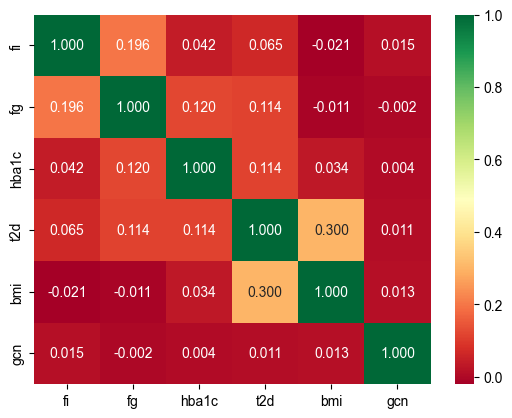

In [57]:
import seaborn as sns
labels = (np.asarray(["{0:.3f}".format(value)
                      for value in np.array(cor_m).flatten()])
         ).reshape(6, 6)

fig, ax = plt.subplots()
ticklabels = ['fi', 'fg', 'hba1c', 't2d', 'bmi', 'gcn']
sns.heatmap(cor_m, annot=labels, fmt="", cmap='RdYlGn', ax=ax, yticklabels = ticklabels, xticklabels = ticklabels)
plt.savefig('../output_figs/fig3_correlation.png')
plt.show()